In [38]:
# Data preprocessing

import csv
from hypothesis_test import *
from kardis_test import *
from mg_calculator import *
from q_finder import *
from graph_distributions import *

file = open(r"Datasets/compas-scores-two-years.csv", mode='r', encoding='utf-8-sig')
csvreader = csv.reader(file)
rowlist = [row for row in csvreader]
for category in rowlist[0]:
    index = rowlist[0].index(category)
    exec(category + " = [row[index] for row in rowlist[1:]]")
file.close()

compas_ids = [int(id[x]) for x in range(len(id)) if days_b_screening_arrest[x] != '' and int(days_b_screening_arrest[x]) <= 30 and 
              int(days_b_screening_arrest[x]) >= -30 and int(is_recid[x]) != -1 and
              c_charge_desc[x] != 'O' and score_text[x] != 'N/A']



idx = 0
recid_scores = []
for x in range(len(id)):
    if idx < len(compas_ids):
        if int(id[x]) == compas_ids[idx]:
            recid_scores.append(score_text[x])
            idx += 1
    else:
        break

idx = 0
recid_races = []
for x in range(len(id)):
    if idx < len(compas_ids):
        if int(id[x]) == compas_ids[idx]:
            recid_races.append(race[x])
            idx += 1
    else:
        break


Null hypothesis (proposed distribution): [0.10603899191631003, 0.2249167855444603, 0.6690442225392297]

Proposed distribution rejected at alpha = 0.05. Kardis = 1.68008031721657e-204.
Any plausible distribution must boost probability over the given distribution by 2.97604819767404e+202, and will therefore have a minimum probability of 8.17559924957314e-10.
Closest plausible distribution: [0.23527651965914717, 0.2995755225465861, 0.4651479577942668]


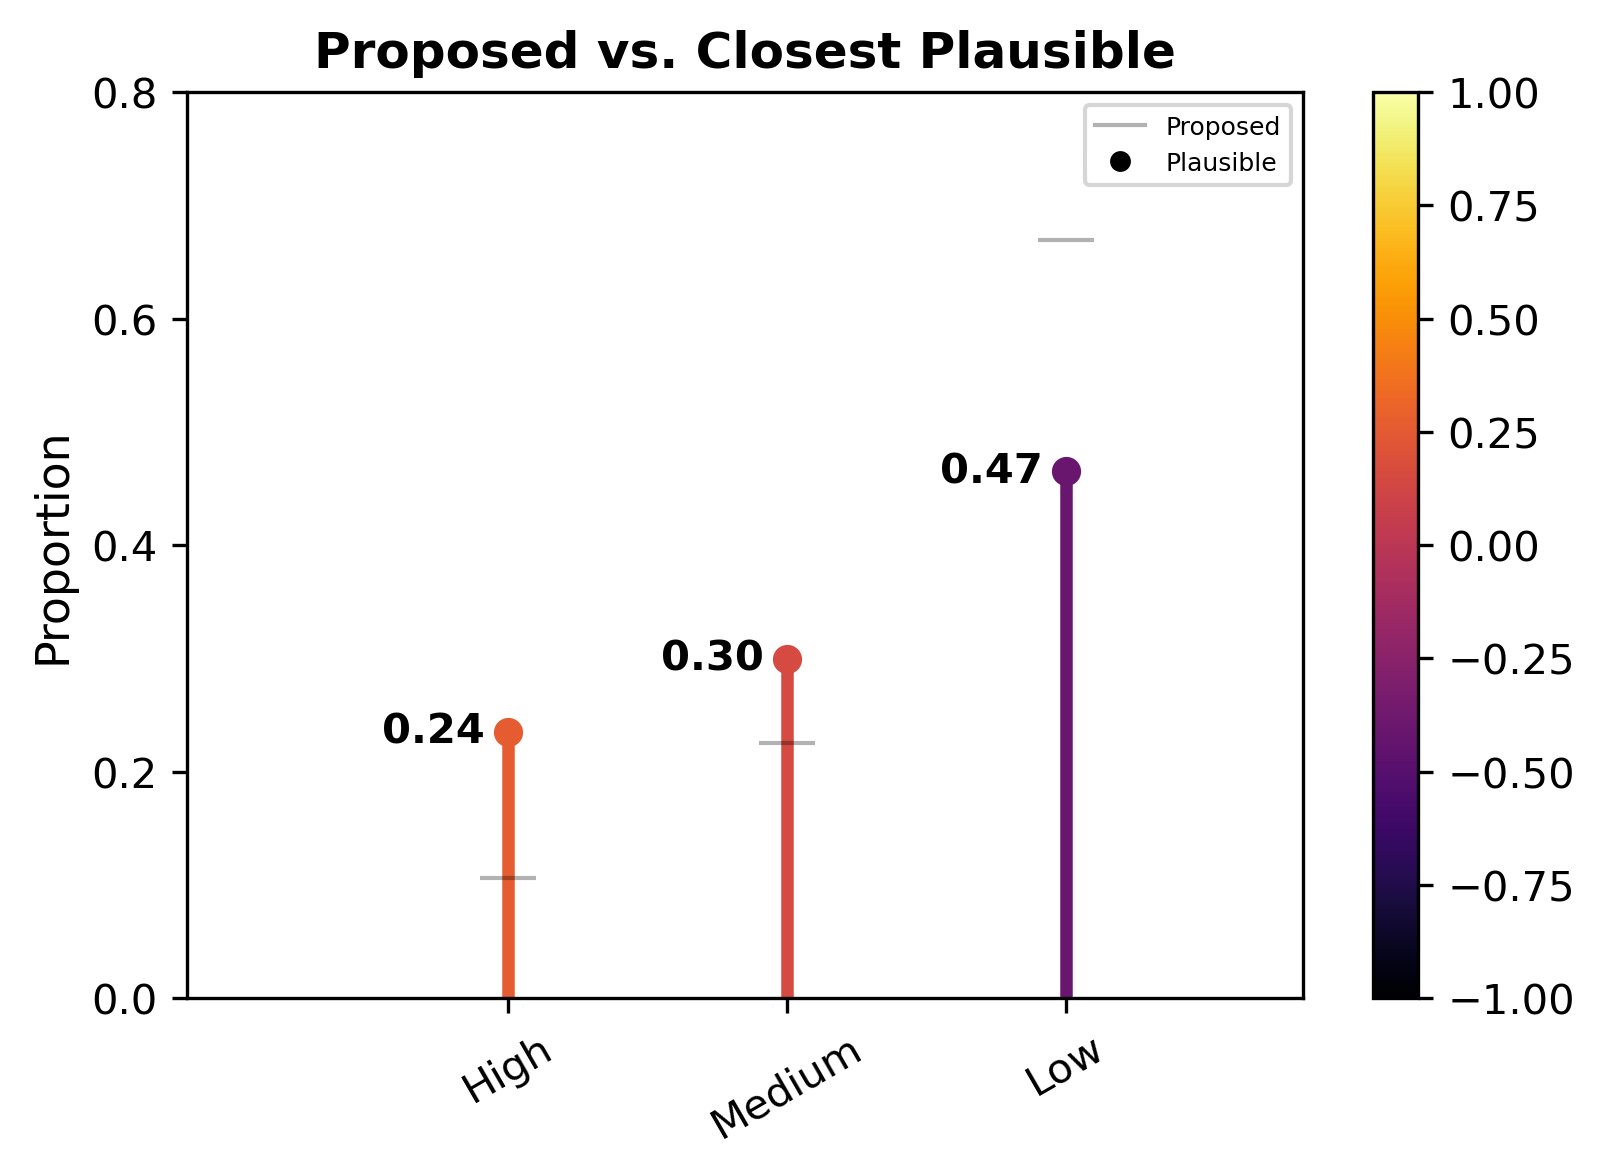

<Figure size 432x288 with 0 Axes>

In [43]:
# Setup and Experiments
recid_races_and_scores = list(filter(lambda x: not x[1] == 'N/A', list(zip(recid_races,recid_scores))))
white_count = len(list(filter(lambda x: x[0] == 'Caucasian', recid_races_and_scores)))
white_props = [recid_races_and_scores.count(('Caucasian','High'))/white_count, \
                recid_races_and_scores.count(('Caucasian', 'Medium'))/white_count, \
                recid_races_and_scores.count(('Caucasian', 'Low'))/white_count]
AA_scores = list(filter(lambda x: x[0] == 'African-American', recid_races_and_scores))

print("Null hypothesis (proposed distribution): " + str(white_props) + "\n")
q_white_props = hypothesis_test(AA_scores,\
                [('African-American','High'),('African-American','Medium'),('African-American','Low')],\
                alpha = 0.05, hypothesis = white_props)[4]

graph_distributions(q_white_props,\
                    [('High'),('Medium'),('Low')],\
                    hypothesis=white_props, filename=r"Results/compas_AA_recid_white_dist.pdf")

Null hypothesis (proposed distribution): [0.3333333333333333, 0.3333333333333333, 0.3333333333333333]

Proposed distribution rejected at alpha = 0.05. Kardis = 3.20146513292596e-23.
Any plausible distribution must boost probability over the given distribution by 1.56178493046097e+21, and will therefore have a minimum probability of 6.34426036699141e-10.
Closest plausible distribution: [0.2967497529730523, 0.32138727723855504, 0.3818629697883928]


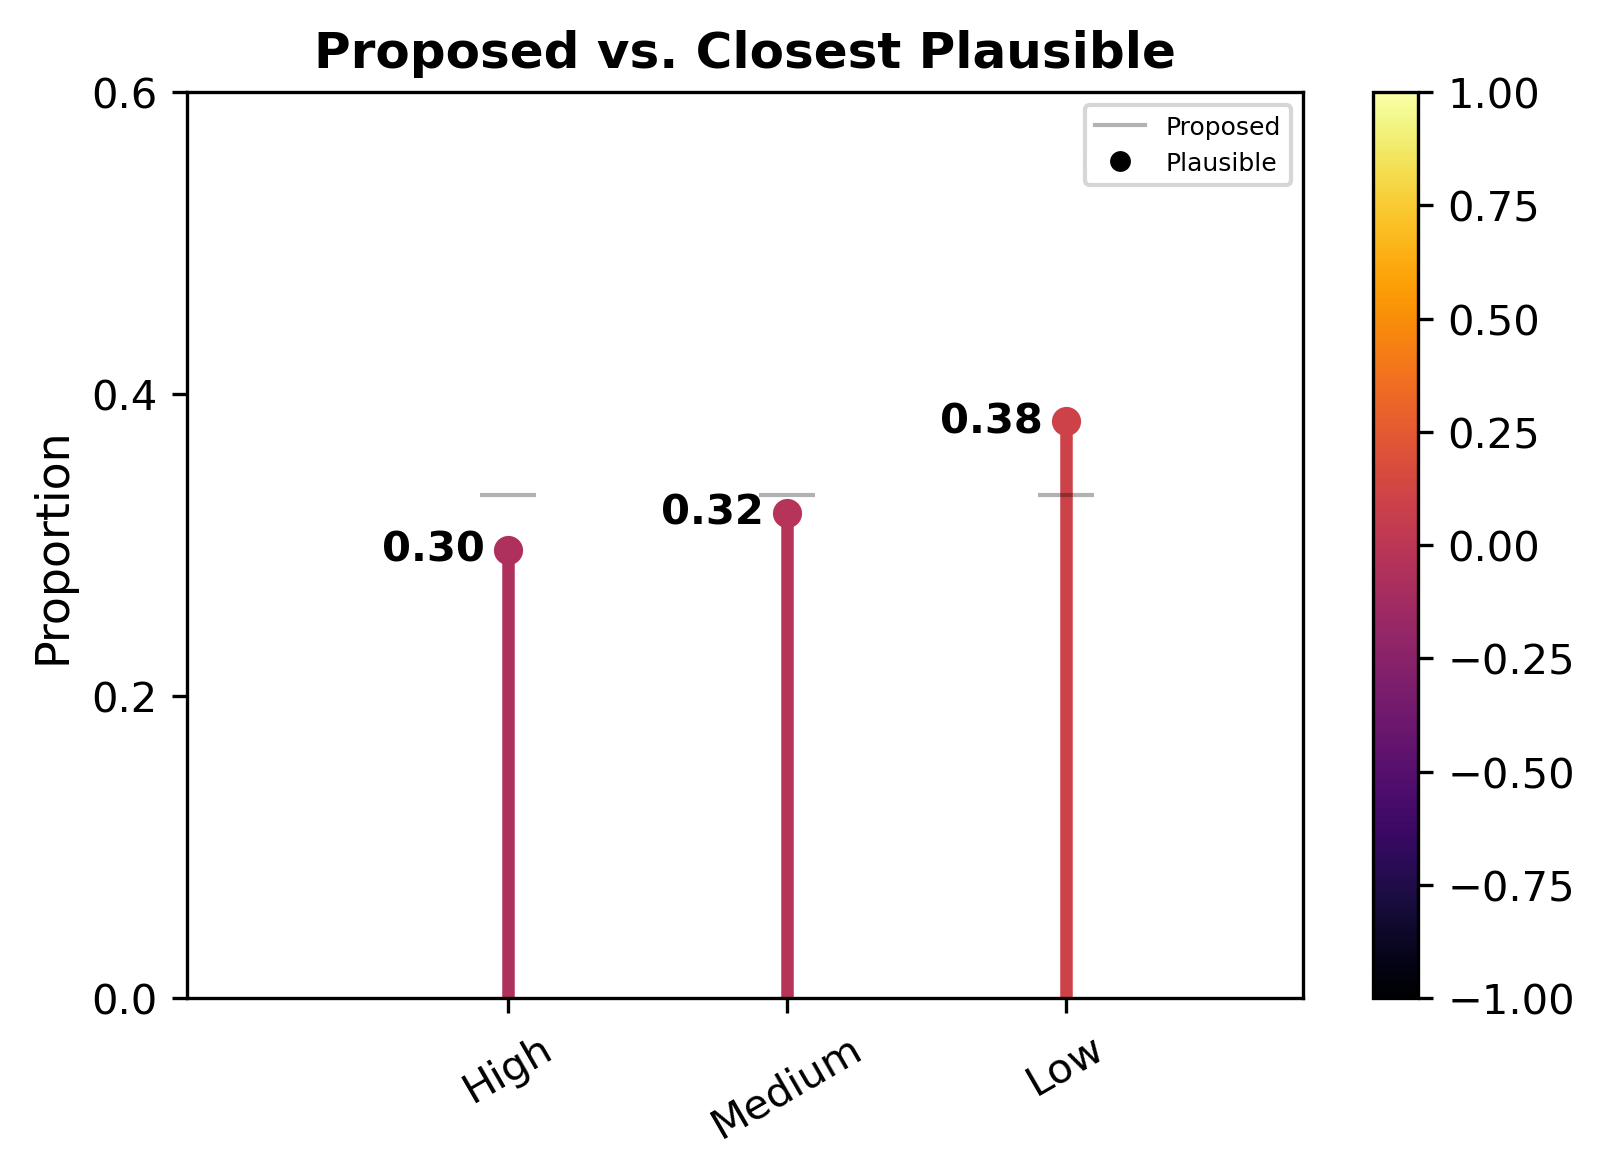

<Figure size 432x288 with 0 Axes>

In [40]:
print("Null hypothesis (proposed distribution): " + str(3*[1/3]) + "\n")

q_uni = hypothesis_test(AA_scores,\
                [('African-American','High'),('African-American','Medium'),('African-American','Low')])[4]

graph_distributions(q_uni,\
                    [('High'),('Medium'),('Low')],\
                    hypothesis=3*[1/3], filename=r"Results/compas_AA_recid_uniform_dist.pdf")